In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
from astropy.table import Table
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [5]:

DeltaTau = ['$\pi$', '$\pi$', '$\pi$', 
           '$\pi$', '$\pi$', '$\pi$',
           '$\pi$', '$\pi$', '$\pi$',
           '$4\pi$', '$4\pi$', '$4\pi$',
           '$4\pi$', '$4\pi$', '$4\pi$',
           '$4\pi$', '$4\pi$', '$4\pi$',
           '$\pi/4$', '$\pi/4$', '$\pi/4$',
           '$\pi/4$', '$\pi/4$', '$\pi/4$',
           '$\pi/4$', '$\pi/4$', '$\pi/4$']

K = [0.25, 0.25, 0.25, 
    1, 1, 1,
    4, 4, 4,
    0.25, 0.25, 0.25,
    1, 1, 1,
    4, 4, 4,
    0.25, 0.25, 0.25,
    1, 1, 1,
    4, 4, 4]

etaM = [0.0025,  0.01, 0.04,
       0.0025, 0.01, 0.04,
       0.0025, 0.01, 0.04,
       0.0025, 0.01, 0.04,
       0.0025, 0.01, 0.04,
       0.0025, 0.01, 0.04,
       0.0025, 0.01, 0.04,
       0.0025, 0.01, 0.04,
       0.0025, 0.01, 0.04]

F1 = [0.00176, 0.00668, 0.02738, 
     0.00153, 0.00704, 0.02782,
     0.00181, 0.00714, 0.03321,
     0.00043, 0.00169, 0.00669,
     0.00041, 0.00167, 0.00719,
     0.00039, 0.00180, 0.00664,
     0.00649, 0.02710, 0.10421,
     0.00634, 0.02630, 0.10195,
     0.00609, 0.02444, 0.11985]

G1 = [0.00159, 0.00636, 0.02527, 
     0.00158, 0.00636, 0.02438,
     0.00165, 0.00631, 0.02525,
     0.00163, 0.00640, 0.02521,
     0.00160, 0.00627, 0.02687,
     0.00168, 0.00621, 0.02567,
     0.00160, 0.00659, 0.02662,
     0.00164, 0.00654, 0.02681,
     0.00163, 0.00634, 0.02627]

F2 = [0.00158, 0.00640, 0.02450, 
     0.00158, 0.00626, 0.02492,
     0.00164, 0.00611, 0.02396, 
     0.00164, 0.00669, 0.02612,
     0.00159, 0.00647, 0.02586,
     0.00165, 0.00600, 0.02424, 
     0.00163, 0.00652, 0.02561,
     0.00154, 0.00636, 0.02570,
     0.00142, 0.00642, 0.02459]

A = [0.00127, 0.05084, 0.25798, 
    0.00048, 0.02059, 0.10454,
    0.00323, 0.02353, 0.52930,
    0.00029, 0.01389, 0.12812,
    0.00204, 0.01322, 0.07210,
    0.00248, 0.06033, 0.19245,
    0.00049, 0.00302, 0.08282,
    0.00018, 0.00267, 0.03219,
    0.00007, 0.00369, 0.09350]

In [6]:
t = Table([[1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17,18,19,20,21, 22,23,24,25,26,27], etaM,K,DeltaTau,F1,G1,F2,A], 
          names=('$Run$', '$\u03B7 \u039C ^{2}$', '$\u039A$', '$\u0394 \u03A4$', r'$ \langle F_{1}^{2} \rangle ^{1/2}$',  r'$\langle G_{1}^{2} \rangle ^{1/2}$', r'$\langle F_{2}^{2} \rangle ^{1/2}$', r'$\langle A^{2} \rangle$'))

t

$Run$,$η Μ ^{2}$,$Κ$,$Δ Τ$,$ \langle F_{1}^{2} \rangle ^{1/2}$,$\langle G_{1}^{2} \rangle ^{1/2}$,$\langle F_{2}^{2} \rangle ^{1/2}$,$\langle A^{2} \rangle$
int64,float64,float64,str7,float64,float64,float64,float64
1,0.0025,0.25,$\pi$,0.00176,0.00159,0.00158,0.00127
2,0.01,0.25,$\pi$,0.00668,0.00636,0.0064,0.05084
3,0.04,0.25,$\pi$,0.02738,0.02527,0.0245,0.25798
4,0.0025,1.0,$\pi$,0.00153,0.00158,0.00158,0.00048
5,0.01,1.0,$\pi$,0.00704,0.00636,0.00626,0.02059
6,0.04,1.0,$\pi$,0.02782,0.02438,0.02492,0.10454
7,0.0025,4.0,$\pi$,0.00181,0.00165,0.00164,0.00323
8,0.01,4.0,$\pi$,0.00714,0.00631,0.00611,0.02353
9,0.04,4.0,$\pi$,0.03321,0.02525,0.02396,0.5293


In [7]:
def funlog(list):
    loglist = []
    for y in list:
        loglist.append(log(y,10))
    return loglist

logF2 = funlog(F2)
logA = funlog(A)

In [8]:
fiducial_second = []
for i in range(len(K)):
    if K[i] == 1 and DeltaTau[i] == '$\pi$':
        fiducial_second.append(i)
        
fiducial_first = []
for i in range(len(etaM)):
    if etaM[i] == 0.01 and DeltaTau[i] == '$\pi$':
        fiducial_first.append(i)
        
fiducial_third = []
for i in range(len(DeltaTau)):
    if etaM[i] == 0.01 and K[i] == 1:
        fiducial_third.append(i)
        
first_K = []
first_A = []
first_F2 = []
for i in fiducial_first:
    first_K.append(K[i])
    first_A.append(logA[i])
    first_F2.append(logF2[i])
    
second_etaM = []
second_A = []
second_F2 = []
for i in fiducial_second:
    second_etaM.append(etaM[i])
    second_A.append(logA[i])
    second_F2.append(logF2[i])
    
third_deltaT = []
third_A = []
third_F2 = []
for i in fiducial_third:
    third_deltaT.append(DeltaTau[i])
    third_A.append(logA[i])
    third_F2.append(logF2[i])
    

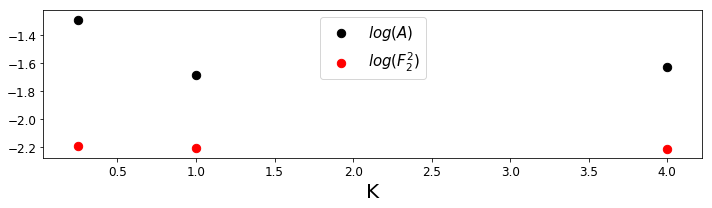

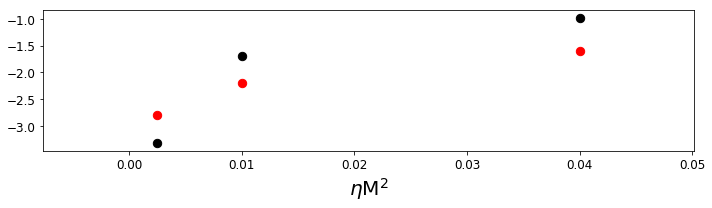

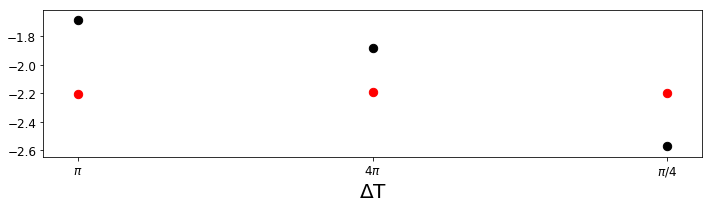

In [11]:
axis_font = {'size':'20'}

plt.figure(figsize=(10,3))
plt.scatter(first_K, first_A, s = 70, c = 'k', label = '$log(A)$')
plt.scatter(first_K, first_F2, s = 70, c = 'r', label = '$log(F_{2}^{2})$')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\u039A$', **axis_font)
plt.tight_layout()
plt.legend(loc='upper center', fontsize=15)
plt.show()


plt.figure(figsize=(10,3))
plt.scatter(second_etaM, second_A, s = 70, c = 'k')
plt.scatter(second_etaM, second_F2, s = 70, c = 'r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\u03B7 \u039C ^{2}$', **axis_font)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(third_deltaT, third_A, s = 70, c = 'k')
plt.scatter(third_deltaT, third_F2, s = 70, c = 'r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\u0394 \u03A4$', **axis_font)
plt.tight_layout()
plt.show()